<h2>Presented By: Yogesh Balani</h2>

<h2>Data Science and Business Analyst Internship</h2>

<h2>Task 04: Exploratory Data Analysis - Terrorism</h2>
<h3>To Do: </h3>
<ul>
  <li>Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’</li>
  <li>As a security/defense analyst, try to find out the hot zone of terrorism.</li>
  <li>What all security issues and insights you can derive by EDA?</li>
</ul>

<h3>Language used: Python</h3>

<h3>Dataset: <a href="https://bit.ly/2TK5Xn5">globalterrorism.csv</a></h3>

<h3>importing required Libraries and Dataset</h3>

In [1]:
# using the inline backend
import numpy as np #useful for many scientific computing in Python
import pandas as pd #primary data structure library
import matplotlib.pyplot as plt #To perform graphical plot of the data
%matplotlib inline
import seaborn as sns # statistical graphics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

<h3>Reading the data set.</h3>

In [2]:
df = pd.read_csv("GlobalTerrorism.csv",engine = "python")
print('Dataset loaded.')

Dataset loaded.


In [3]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
# Checking the shape of the dataset
df.shape

(181691, 135)

<h3>The shape of the dataset given shows that it has 181691 rows and 19 columns.</h3>

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

<h3>Renaming some of the columns</h3>

In [6]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'Country','region_txt':'Region','provstate':'State','natlty1_txt':'nationality_of_target','weaptype1_txt':'WeaponType','nkill':'killed','nwound':'wounded'},inplace=True)

<h3>Selecting the relevant columns</h3>

In [7]:
df=df[['year','month','day','Country','Region','city','extended','latitude','longitude','vicinity','suicide','success','State','nationality_of_target','WeaponType','killed','wounded']]

In [8]:
# To see what the data set looks like, we'll use the head() method.
# first 5 records from the dataset
df.head()

,year,month,day,Country,Region,city,extended,latitude,longitude,vicinity,suicide,success,State,nationality_of_target,WeaponType,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0,18.456792,-69.951164,0,0,1,NaN,Dominican Republic,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,0,19.371887,-99.086624,0,0,1,Federal,Belgium,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,0,15.478598,120.599741,0,0,1,Tarlac,United States,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,0,37.997490,23.762728,0,0,1,Attica,United States,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,0,33.580412,130.396361,0,0,1,Fukouka,United States,Incendiary,NaN,NaN


In [9]:
# To see last 5 records from the dataset we'll use the tail() method
df.tail()

,year,month,day,Country,Region,city,extended,latitude,longitude,vicinity,suicide,success,State,nationality_of_target,WeaponType,killed,wounded
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,0,2.359673,45.385034,0,0,1,Middle Shebelle,Somalia,Firearms,1.0,2.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,0,35.407278,35.942679,1,0,1,Lattakia,Russia,Explosives,2.0,7.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,0,6.900742,124.437908,0,0,1,Maguindanao,Philippines,Incendiary,0.0,0.0
181689,2017,12,31,India,South Asia,Imphal,0,24.798346,93.940430,0,0,0,Manipur,India,Explosives,0.0,0.0
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,0,7.209594,124.241966,0,0,0,Maguindanao,Philippines,Explosives,0.0,0.0


In [10]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   181691 non-null  int64  
 1   month                  181691 non-null  int64  
 2   day                    181691 non-null  int64  
 3   Country                181691 non-null  object 
 4   Region                 181691 non-null  object 
 5   city                   181257 non-null  object 
 6   extended               181691 non-null  int64  
 7   latitude               177135 non-null  float64
 8   longitude              177134 non-null  float64
 9   vicinity               181691 non-null  int64  
 10  suicide                181691 non-null  int64  
 11  success                181691 non-null  int64  
 12  State                  181270 non-null  object 
 13  nationality_of_target  180132 non-null  object 
 14  WeaponType             181691 non-nu

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
month,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
day,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
extended,181691.0,0.045346,0.208063,0.000000e+00,0.000000,0.000000,0.000000,1.000000
latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667
vicinity,181691.0,0.068297,0.284553,-9.000000e+00,0.000000,0.000000,0.000000,1.000000
suicide,181691.0,0.036507,0.187549,0.000000e+00,0.000000,0.000000,0.000000,1.000000
success,181691.0,0.889598,0.313391,0.000000e+00,1.000000,1.000000,1.000000,1.000000
killed,171378.0,2.403272,11.545741,0.000000e+00,0.000000,0.000000,2.000000,1570.000000


In [12]:
# checking for the null values
df.isnull().sum()

year                         0
month                        0
day                          0
Country                      0
Region                       0
city                       434
extended                     0
latitude                  4556
longitude                 4557
vicinity                     0
suicide                      0
success                      0
State                      421
nationality_of_target     1559
WeaponType                   0
killed                   10313
wounded                  16311
dtype: int64

In [13]:
df['year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: year, dtype: int64

In [14]:
df['month'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: month, dtype: int64

In [15]:
df['day'].value_counts()

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: day, dtype: int64

In [16]:
df['Country'].value_counts()

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
Andorra                  1
Wallis and Futuna        1
Vatican City             1
North Korea              1
New Hebrides             1
Name: Country, Length: 205, dtype: int64

In [17]:
df['nationality_of_target'].value_counts()

Iraq                              24113
Pakistan                          13900
India                             12098
Afghanistan                       10931
Colombia                           7922
                                  ...  
Western Sahara                        1
Antigua and Barbuda                   1
People's Republic of the Congo        1
Tuvalu                                1
Greenland                             1
Name: nationality_of_target, Length: 215, dtype: int64

<h3>The Number of killings in each Region</h3>

In [18]:
killings_per_region=df.groupby(['Region'],as_index=False)['killed']
killings_per_region.sum()

,Region,killed
0,Australasia & Oceania,150.0
1,Central America & Caribbean,28708.0
2,Central Asia,1000.0
3,East Asia,1152.0
4,Eastern Europe,7415.0
5,Middle East & North Africa,137642.0
6,North America,4916.0
7,South America,28849.0
8,South Asia,101319.0
9,Southeast Asia,15637.0


<h3>Maximum Number of Killings in each region</h3>

In [19]:
killings_per_region.max()

,Region,killed
0,Australasia & Oceania,17.0
1,Central America & Caribbean,300.0
2,Central Asia,50.0
3,East Asia,184.0
4,Eastern Europe,344.0
5,Middle East & North Africa,1570.0
6,North America,1384.0
7,South America,275.0
8,South Asia,518.0
9,Southeast Asia,116.0


In [20]:
# Sum of Killings
df['killed'].sum()

411868.0

In [21]:
# Sum of wounded people
df['wounded'].sum()

523869.0

In [22]:
# Total Casualities
df['casualities'] = df['killed'] + df['wounded']
df['casualities'].sum()

872892.0

In [23]:
 # number of casualities according to the region
df1 = df.groupby('Region')['casualities'].sum()
df2 = df1.to_frame()
df2.reset_index()

,Region,casualities
0,Australasia & Oceania,409.0
1,Central America & Caribbean,34530.0
2,Central Asia,2969.0
3,East Asia,10003.0
4,Eastern Europe,18239.0
5,Middle East & North Africa,329807.0
6,North America,26398.0
7,South America,43562.0
8,South Asia,234366.0
9,Southeast Asia,40841.0


In [24]:
# Casualities count according to year and region
region_year = df.groupby(['Region','year'])['casualities'].count()
region_year.head()

Region                 year
Australasia & Oceania  1970    1
                       1971    1
                       1972    8
                       1973    1
                       1974    1
Name: casualities, dtype: int64

Text(0, 0.5, 'Casualities')

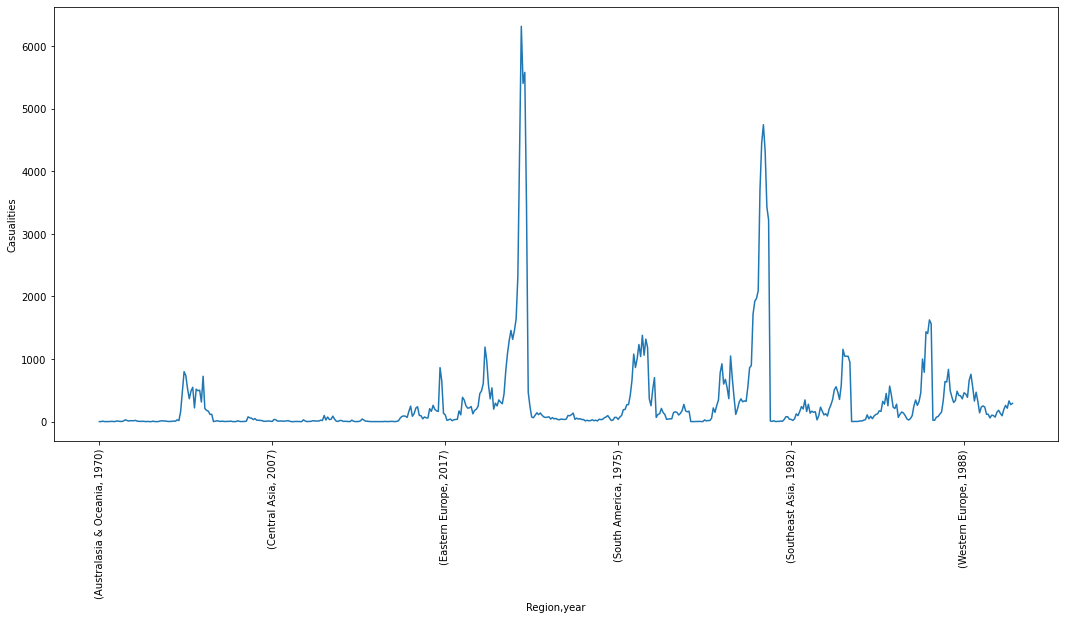

In [25]:
# Visualisation of year and region wise casualities
plt.subplots(figsize=(18,8))
df.groupby(['Region','year']).count()['casualities'].plot()
plt.xticks(rotation=90)
plt.ylabel('Casualities')

In [26]:
# all the rows where atleast one column value is missing.
missing = df[df.isnull().any(axis=1)]
missing.shape

(23037, 18)

In [27]:
df.shape

(181691, 18)

In [28]:
# Countries with most Attacks
print("Country with most Terriost Attacks is: " + df["Country"].value_counts().idxmax() + 
      " with "+ str(df["Country"].value_counts()[0]) ,""+  'Attacks')

Country with most Terriost Attacks is: Iraq with 24636 Attacks


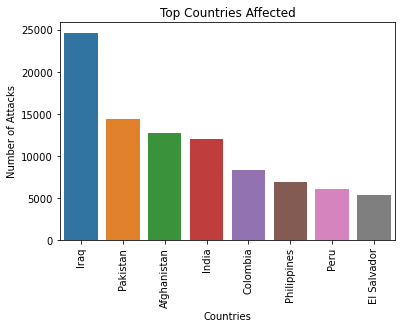

In [29]:
sns.barplot(x = df['Country'].value_counts()[:8].index, y= df['Country'].value_counts()[:8].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<h4>The Country with the Highest Terrorist Attacks: Iraq</h4>

In [30]:
# states with high attacks
print("Country with the most terriost attack is: " + df['State'].value_counts().idxmax() + " With " + str(df['State'].value_counts()[0]))

Country with the most terriost attack is: Baghdad With 7645


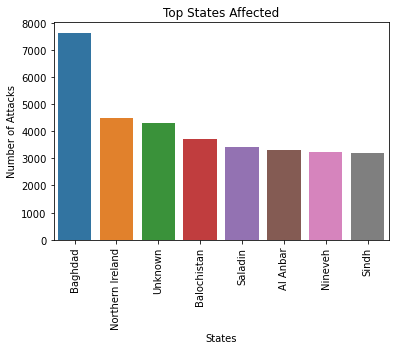

In [31]:
sns.barplot(x = df['State'].value_counts()[:8].index, y = df['State'].value_counts()[:8].values)
plt.title('Top States Affected')
plt.xlabel('States')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<h4>The State with the Highest Terrorist Attacks: Baghdad</h4>

In [32]:
# region with most attacks
print("Region with most terriost attacks is: " + df['Region'].value_counts().idxmax() + " with " + str(df['Region'].value_counts()[0]))

Region with most terriost attacks is: Middle East & North Africa with 50474


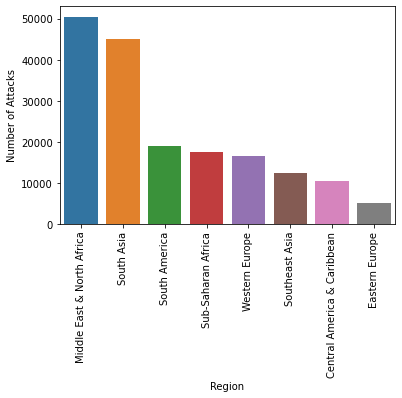

In [33]:
sns.barplot(x = df['Region'].value_counts()[:8].index, y = df['Region'].value_counts()[:8].values)
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<h4>The Region with the Highest Terrorist Attacks: Middle East & North America</h4>

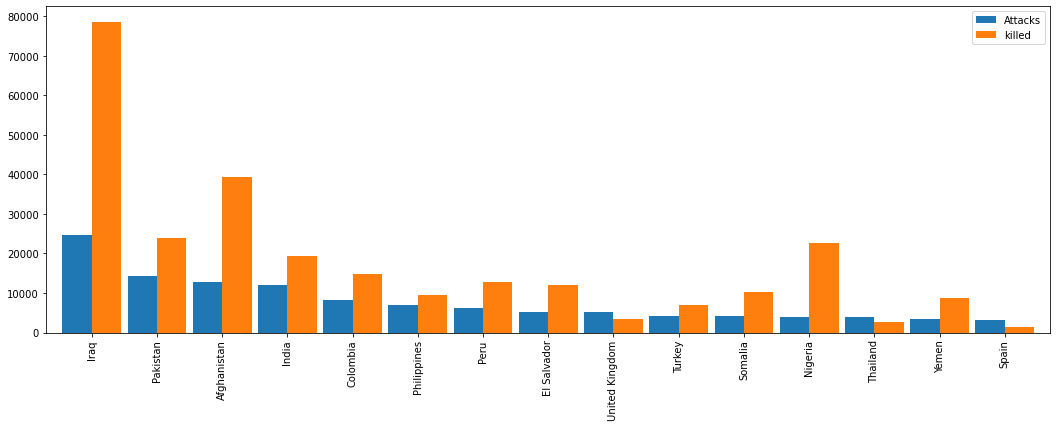

In [34]:
# the number of times a country has been attacked with respect to the killings in that country.

count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('Country')['killed'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

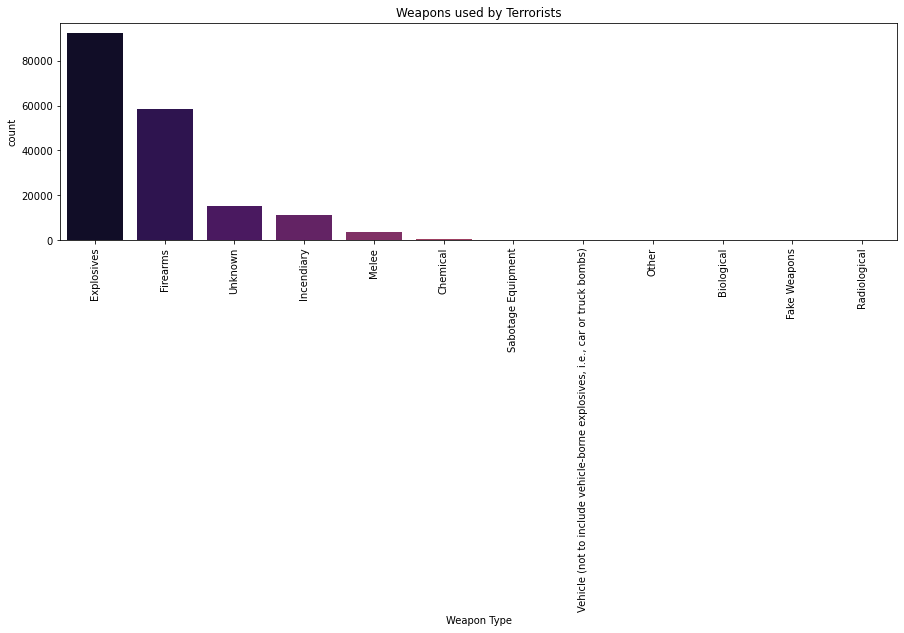

In [35]:
# Weapons Used in these attacks
plt.subplots(figsize=(15,4))
sns.countplot(x = df['WeaponType'], palette='inferno',order=df['WeaponType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

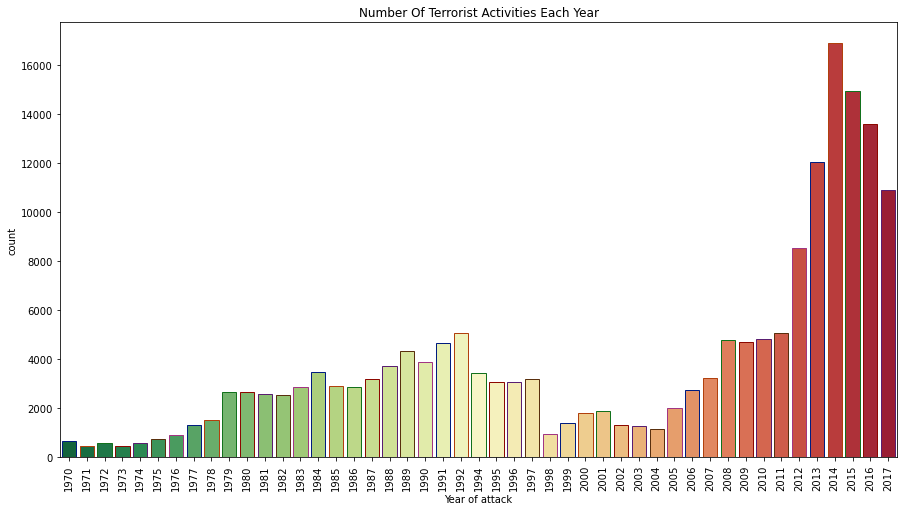

In [36]:
# Terroist activities each year
plt.subplots(figsize=(15,8))
sns.countplot(x = df['year'], palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [37]:
print("Country with most Terriost Attacks is " + df["city"].value_counts().idxmax() + 
      " with "+ str(df["city"].value_counts()[:2]))

Country with most Terriost Attacks is Unknown with Unknown    9775
Baghdad    7589
Name: city, dtype: int64


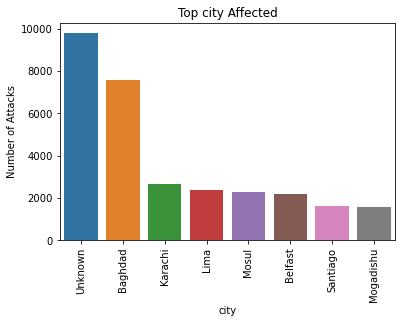

In [38]:
sns.barplot(x = df['city'].value_counts()[:8].index, y = df['city'].value_counts()[:8].values)
plt.title('Top city Affected')
plt.xlabel('city')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<h3>Conclusion: </h3>
<h3>Most Affected Country is: Iraq</h3>
<h3>Most Affected State is: Baghdad</h3>
<h3>Most Affected Region is: Middle East & North America </h3>
<h3>Most Affected City is: Baghdad</h3>

<h4>Task 04 Completed</h4>
<h4>Thank You!</h4>